In [17]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [18]:
img = mpimg.imread('../datasets/lena.png')

In [19]:
img.shape

(512, 512, 3)

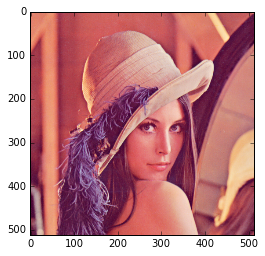

In [20]:
plt.imshow(img)

### blur

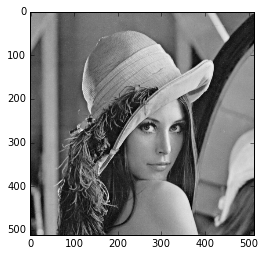

In [21]:
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')

In [22]:
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)

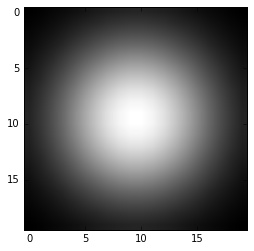

In [23]:
plt.imshow(W, cmap='gray')

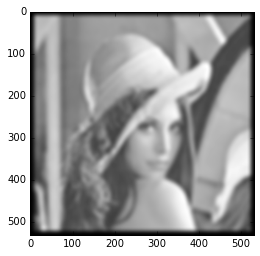

In [24]:
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')

In [25]:
out.shape

(531, 531)

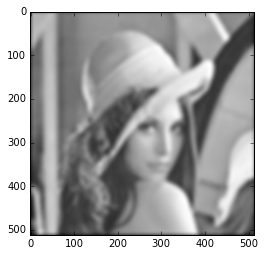

In [26]:
out = convolve2d(bw, W, mode='same')
plt.imshow(out, cmap='gray')

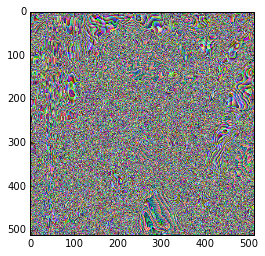

In [27]:
out3 = np.zeros(img.shape)
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W, mode='same')
plt.imshow(out3)

### edge detection

In [28]:
Hx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
], dtype=np.float32)

In [29]:
Hy = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
], dtype=np.float32)

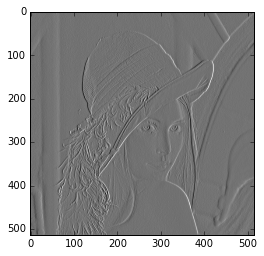

In [30]:
Gx = convolve2d(bw, Hx)
plt.imshow(Gx, cmap='gray')

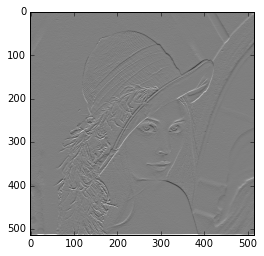

In [31]:
Gy = convolve2d(bw, Hy)
plt.imshow(Gy, cmap='gray')

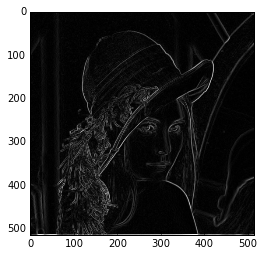

In [32]:
G = np.sqrt(Gx*Gx + Gy*Gy)
plt.imshow(G, cmap='gray')

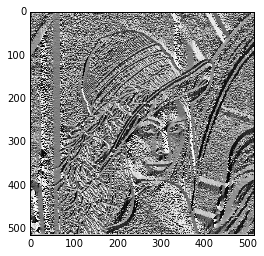

In [33]:
theta = np.arctan2(Gy, Gx)
plt.imshow(theta, cmap='gray')